In [32]:
import numpy as np
import matplotlib.pyplot as plt

# Plots LaTeX-Style
plt.rcParams['mathtext.fontset'] = 'stix'
plt.rcParams['font.family'] = 'STIXGeneral'

In [33]:
T = 1
h = 0.1
n = int(T/h) + 1

A = np.array([[0, 1], [-1, 0]])
Ak = np.array([[1, h],[-h, 1]])
Ck = np.array([1, 0]) # z = x
x0 = np.array([1, 1])

x_var = 0.1
z_var = 0.1
Q = np.array([[x_var, 0], [0, x_var]])
R = z_var

In [34]:
x_real = np.zeros((n, 2))
x_real[0] = x0
for i in range(1, n):
    x_real[i] = x_real[i-1] + h * A @ x_real[i-1]

x_pred = np.zeros((n, 2))
Cov_pred = np.zeros((n, 2, 2))

x_pred[0] = x0
Cov_pred[0] = Q

x_filt = np.zeros((n, 2))
Cov_filt = np.zeros((n, 2, 2))

x_filt[0] = x0
Cov_filt[0] = Q

z = np.zeros(n)
z[0] = Ck @ x0 + R * np.random.normal()

In [35]:
print(Cov_filt[0])

for i in range(1, n):
    x_pred[i] = Ak @ x_pred[i-1]
    Cov_pred[i] = Ak @ Cov_pred[i-1] @ A.T + Q

    z[i] = Ck @ x_real[i] + R * np.random.normal()

    K = Cov_pred[i] @ Ck.T * 1/(Ck @ Cov_pred[i] @ Ck.T + R)
    x_filt[i] = x_pred[i] + K * (z[i] - Ck @ x_pred[i])
    Cov_filt[i] = Cov_pred[i] - K * Ck @ Cov_pred[i]

    print(Cov_filt[i])

[[0.1 0. ]
 [0.  0.1]]
[[ 0.05238095 -0.04761905]
 [ 0.04238095  0.16238095]]
[[ 0.00990991 -0.10810811]
 [ 0.11890991  0.02289189]]
[[-0.02330456 -0.02836005]
 [ 0.01859544 -0.02426005]]
[[ 0.04289304  0.00947976]
 [-0.04881696  0.06798976]]
[[ 0.05537925 -0.03277394]
 [ 0.00471825  0.16478706]]
[[ 0.02803741 -0.09459914]
 [ 0.12053231  0.07581796]]
[[-0.03804507 -0.07193073]
 [ 0.04162152 -0.04738392]]
[[ 0.03109973  0.01539867]
 [-0.0363868   0.03818676]]
[[ 0.05592052 -0.01891115]
 [-0.02804004  0.15085419]]
[[ 0.0411016  -0.07724713]
 [ 0.10247089  0.12368997]]


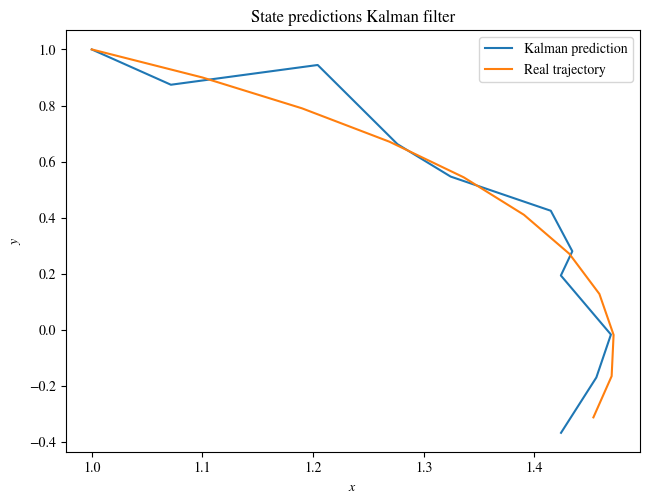

In [36]:
fig, ax = plt.subplots()
fig.tight_layout()

ax.plot(x_filt[:,0], x_filt[:,1], label='Kalman prediction')
ax.plot(x_real[:,0], x_real[:,1], label='Real trajectory')

ax.set_xlabel('$x$')
ax.set_ylabel('$y$')
ax.set_title('State predictions Kalman filter')
ax.legend()
plt.savefig('HW3_2_Kalman.png', dpi=300)
plt.show()